# AJAX (ASynchronous Javascript And XML)
- 자바스크립트를 이용해 서버와 브라우저가 비동기 방식으로 데이터를 교환할 수 있는 통신기능
- 클라이언트와 서버간에 JSON 이나 XML 데이터를 주고받음.
- 비동기 방식을 이용하면 필요한 데이터만 불러오면서 리소스 낭비를 줄일 수 있다.
- AJAX는 XMLHttpRequest객체를 통해 서버에 request한다.
- JSON이나 XML형태로 필요한 데이터만 받아 갱신하기 때문에 그만큼의 자원과 시간을 아낄 수 있다.

# 부동산 정보 크롤링 
- 데이터 출처 조인스 : http://price.joinsland.joins.com/
- let's try 강남구 대치동...

```
import pandas as pd
url = 'https://maemul.joinsland.joins.com/area/?mcateGroup=A1&areaCode=1168010600'
dfs = pd.read_html(url, 'lxml')   # read html tables
dfs 
```
- html source 에는 table 이 보이지만 pandas.read_html()로 읽었을 때 테이블이 읽히지 않는다. (Error: No tables found)

In [1]:
import pandas as pd
url = 'https://maemul.joinsland.joins.com/area/?mcateGroup=A1&areaCode=1168010600'

try:
    dfs = pd.read_html(url, 'lxml')   # read html tables
except:
    print ("Error: No tables found.")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Starting with pandas version 2.0 all arguments of read_html except for the argument 'io' will be keyword-only
  """


Error: No tables found.


- HTML source 를 가지고 와서 확인해 보아도 보이지 않는다.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url = 'https://maemul.joinsland.joins.com/area/?mcateGroup=A1&areaCode=1168010600'
link = requests.get(url)
soup = BeautifulSoup(link.text, 'html.parser')

In [3]:
soup.table  # no table found

In [4]:
# soup   # -> source 에 <table> 이 보이지 않는다.

## 페이지 소스 확인

메뉴에서 "보기 > 개발자 보기 > 소스보기" 선택하여 페이지 소스를 확인

크롬 개발자 도구로 table과 데이터가 보이지만, 소스 보기를 하면 소스에는 데이터가 보이지 않는다

이 처럼 크롬개발자 도구에서는 데이터가 있으나, 페이지 소스에는 데이터가 없는 경우는 다음 두 가지 중의 하나
* Ajax로 데이터를 요청하여 데이터를 표현 &rarr; 데이터 요청 URL을 따로 분석
* JavaScript가 실행되어 데이터를 표현 &rarr; Selenium 사용

Ajax (Asynchronous JavaScript and XML, 에이잭스)는 자바스크립트로 요청하는 비동기 데이터 요청.

## Ajax 데이터 요청 확인
* Network 탭을 열고
* 검색조건이 달라질 때('동'을 선택), 어떤 데이터가 오가는지 살펴본다
* 요청/응답 데이터들 중에 데이터기 포함되어 오가는지 살펴본다.

    

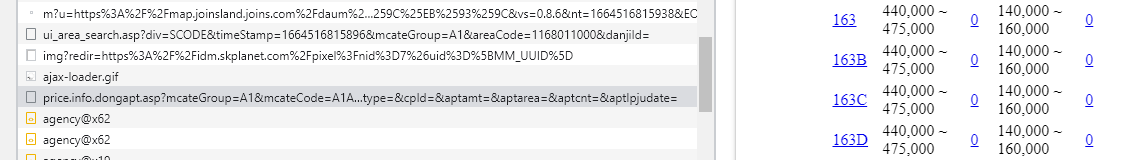

## < CORS Error 발생 의경우>
- CORS(Cross-Origin Resource Sharing) policy eror 발생하면
  - Google 에서 'Allow CORS: Access-Control-Allow-Origin' 을 찾아 그 사이트에 가서 Chrome 에 Extension 설치를 한다. (It lets you easily perform cross-domain Ajax requests in web applications.)
  - Chrome 의 우측 상단의 Extension 을 클릭해서 "Allow CORS" 을 on/off 조정할 수 있다.

## joins.com/ajax
여기서는 다음 URL로 데이터가 요청/응답 되었음을 확인할 수 있다

"https://maemul.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1168011000&danjiId=&ptype=&cpId=&aptamt=&aptarea=&aptcnt=&aptIpjudate="

<img width="70%" src="http://i.imgur.com/wAzM0TP.png">
    

In [81]:
url = 'https://maemul.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1168011800'
dfs = pd.read_html(url, encoding='utf-8')
len(dfs)

1

In [82]:
url = "https://maemul.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1168011000"
# url = "https://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1168011000"
dfs = pd.read_html(url, encoding='utf-8')
len(dfs)

1

In [83]:
dfs[0]

,단지명,면적 (㎡),매매가 (만원),매물,전세가 (만원),매물.1,문의처
0,미성1차(아파트),111A,"320,000 ~ 375,000",0,"87,500 ~ 100,000",0,NaN
1,미성1차(아파트),112B,"320,000 ~ 375,000",0,"87,500 ~ 100,000",0,NaN
2,미성1차(아파트),112C,"320,000 ~ 375,000",0,"87,500 ~ 100,000",0,NaN
3,미성1차(아파트),112D,"320,000 ~ 375,000",0,"87,500 ~ 100,000",0,NaN
4,미성1차(아파트),163,"440,000 ~ 475,000",0,"140,000 ~ 160,000",0,NaN
...,...,...,...,...,...,...,...
105,현대65동(대림아크로빌)(아파트),282A,"775,000 ~ 850,000",0,"220,000 ~ 245,000",0,NaN
106,현대8차(아파트),115,"335,000 ~ 380,000",0,"75,000 ~ 95,000",0,NaN
107,현대8차(아파트),119A,"335,000 ~ 380,000",0,"75,000 ~ 95,000",0,NaN
108,현대8차(아파트),119B,"335,000 ~ 380,000",0,"75,000 ~ 95,000",0,NaN


다음 URL의 인자로 다음 값들이 전달.

http://price.joinsland.joins.com/ajax/price.info.dongapt.asp
* mcateGroup: A1=아파트, A6=오피스텔
* mcateCode: A1A3A4
* areaCode=1168010600

결과적으로 지역코드(areaCode)만 지정하면 가격  데이터를 가져올 수 있다.

## 지역이름과 코드
(참고) joinsland.joins.com 자체에도 법정동을 조회하는 내용이 있으나 데이터가 온전한 JSON 이 아니어서 가공하기 어렵다

In [84]:
# 구/시/군 (MCODE) 코드 가져오기

import requests

# 서울특별시 하위 '구/시/군' 읽기
area_code = '110000000' 
url = 'http://price.joinsland.joins.com/ajax/area_search.asp?div=MCODE&areaCode=' + area_code
r = requests.get(url)
print(r.text)

# JSON처럼 보이지만 JSON 규격을 따르지 않고 있다

[{seq:'1', idx:1, name:'강남구', label:'강남구', value:'1168000000', cnt:'0'},{seq:'2', idx:2, name:'강동구', label:'강동구', value:'1174000000', cnt:'0'},{seq:'3', idx:3, name:'강북구', label:'강북구', value:'1130500000', cnt:'0'},{seq:'4', idx:4, name:'강서구', label:'강서구', value:'1150000000', cnt:'0'},{seq:'5', idx:5, name:'관악구', label:'관악구', value:'1162000000', cnt:'0'},{seq:'6', idx:6, name:'광진구', label:'광진구', value:'1121500000', cnt:'0'},{seq:'7', idx:7, name:'구로구', label:'구로구', value:'1153000000', cnt:'0'},{seq:'8', idx:8, name:'금천구', label:'금천구', value:'1154500000', cnt:'0'},{seq:'9', idx:9, name:'노원구', label:'노원구', value:'1135000000', cnt:'0'},{seq:'10', idx:10, name:'도봉구', label:'도봉구', value:'1132000000', cnt:'0'},{seq:'11', idx:11, name:'동대문구', label:'동대문구', value:'1123000000', cnt:'0'},{seq:'12', idx:12, name:'동작구', label:'동작구', value:'1159000000', cnt:'0'},{seq:'13', idx:13, name:'마포구', label:'마포구', value:'1144000000', cnt:'0'},{seq:'14', idx:14, name:'서대문구', label:'서대문구', value:'1141000000', 

In [85]:
r.text

"[{seq:'1', idx:1, name:'강남구', label:'강남구', value:'1168000000', cnt:'0'},{seq:'2', idx:2, name:'강동구', label:'강동구', value:'1174000000', cnt:'0'},{seq:'3', idx:3, name:'강북구', label:'강북구', value:'1130500000', cnt:'0'},{seq:'4', idx:4, name:'강서구', label:'강서구', value:'1150000000', cnt:'0'},{seq:'5', idx:5, name:'관악구', label:'관악구', value:'1162000000', cnt:'0'},{seq:'6', idx:6, name:'광진구', label:'광진구', value:'1121500000', cnt:'0'},{seq:'7', idx:7, name:'구로구', label:'구로구', value:'1153000000', cnt:'0'},{seq:'8', idx:8, name:'금천구', label:'금천구', value:'1154500000', cnt:'0'},{seq:'9', idx:9, name:'노원구', label:'노원구', value:'1135000000', cnt:'0'},{seq:'10', idx:10, name:'도봉구', label:'도봉구', value:'1132000000', cnt:'0'},{seq:'11', idx:11, name:'동대문구', label:'동대문구', value:'1123000000', cnt:'0'},{seq:'12', idx:12, name:'동작구', label:'동작구', value:'1159000000', cnt:'0'},{seq:'13', idx:13, name:'마포구', label:'마포구', value:'1144000000', cnt:'0'},{seq:'14', idx:14, name:'서대문구', label:'서대문구', value:'1141000000',

## 법정동 이름과 코드
부동산 정보등에는 법정동 코드가 사용된다. 
* 법정동 코드(8자리)
* 2(시/도) + 2자리(구/군/구) + 2자리(읍/면/동) + 2자리(리/단지)

법정동 전체 코드는 아래 링크

* https://goo.gl/tM6r3v

상세한 내용은 다음 링크에 설명을 참고

* http://nbviewer.jupyter.org/urls/financedata.github.io/posts/korea-area-code.ipynb

## 정리된 사이트
- 위에서 본 것처럼 Joins 자체에 있는 법정동을 조회하지 않고 아래 사이트에 정리되어 있는 것을 이용해서 사용.

In [86]:
import pandas as pd
df_areacode = pd.read_csv('https://goo.gl/tM6r3v', sep='\t', dtype={'법정동코드':str, '법정동명':str})
df_areacode.head()

,법정동코드,법정동명,폐지여부
0,1100000000,서울특별시,존재
1,1111000000,서울특별시 종로구,존재
2,1111010100,서울특별시 종로구 청운동,존재
3,1111010200,서울특별시 종로구 신교동,존재
4,1111010300,서울특별시 종로구 궁정동,존재


In [87]:
df_areacode.dtypes

법정동코드    object
법정동명     object
폐지여부     object
dtype: object

In [57]:
### 메인 코드 시작 ###

import pandas as pd

def get_areacode():
    df_areacode = pd.read_csv('https://goo.gl/tM6r3v', sep='\t', dtype={'법정동코드':str, '법정동명':str})
    df_areacode = df_areacode[df_areacode['폐지여부'] == '존재']
    df_areacode = df_areacode[['법정동코드', '법정동명']]
    return df_areacode

def get_province():
    df_areacode = get_areacode()
    df_province = df_areacode[ df_areacode['법정동코드'].str.contains('\d{2}0{8}|36110{6}')]   # \d: digit(숫자)
                                                                                               # 0{8}: 0 이 8개
    return df_province

In [88]:
df_areacode = get_areacode()
df_areacode.head()

,법정동코드,법정동명
0,1100000000,서울특별시
1,1111000000,서울특별시 종로구
2,1111010100,서울특별시 종로구 청운동
3,1111010200,서울특별시 종로구 신교동
4,1111010300,서울특별시 종로구 궁정동


In [90]:
df_province = get_province()
df_province

,법정동코드,법정동명
0,1100000000,서울특별시
2615,2600000000,부산광역시
2912,2700000000,대구광역시
3244,2800000000,인천광역시
3579,2900000000,광주광역시
3825,3000000000,대전광역시
4009,3100000000,울산광역시
4241,3611000000,세종특별자치시
4391,4100000000,경기도
10867,4200000000,강원도


In [91]:
df_areacode[ df_areacode['법정동명'].str.contains('서울특별시 강남구') ]

,법정동코드,법정동명
1003,1168000000,서울특별시 강남구
1037,1168010100,서울특별시 강남구 역삼동
1039,1168010300,서울특별시 강남구 개포동
1040,1168010400,서울특별시 강남구 청담동
1041,1168010500,서울특별시 강남구 삼성동
1042,1168010600,서울특별시 강남구 대치동
1043,1168010700,서울특별시 강남구 신사동
1044,1168010800,서울특별시 강남구 논현동
1045,1168011000,서울특별시 강남구 압구정동
1046,1168011100,서울특별시 강남구 세곡동


# Direct Access with pd.read_html()
- read table from:
http://price.joinsland.joins.com/ajax/price.info.dongapt.asp
  * mcateGroup A1=아파트, A6=오피스텔
  * mcateCode: A1A3A4
  * areaCode=1168010600 # 강남구 대치동

In [92]:
import pandas as pd
url = 'http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=' + '1168010600'
    
print(url)

http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1168010600


In [93]:
dfs = pd.read_html(url, encoding='utf-8')      # list

In [94]:
type(dfs), len(dfs), type(dfs[0])

(list, 1, pandas.core.frame.DataFrame)

In [95]:
dfs[0].head(10)

,단지명,면적 (㎡),매매가 (만원),매물,전세가 (만원),매물.1,문의처
0,개포우성1차(아파트),102,"285,000 ~ 305,000",3,"110,000 ~ 130,000",0,NaN
1,개포우성1차(아파트),148,"385,000 ~ 407,500",0,"167,500 ~ 190,000",1,NaN
2,개포우성1차(아파트),181,"455,000 ~ 497,500",2,"190,000 ~ 220,000",0,NaN
3,개포우성1차(아파트),214,"500,000 ~ 545,000",0,"255,000 ~ 285,000",0,NaN
4,개포우성2차(아파트),101,"285,000 ~ 307,500",0,"110,000 ~ 130,000",1,NaN
5,개포우성2차(아파트),146,"397,500 ~ 437,500",1,"172,500 ~ 195,000",1,NaN
6,개포우성2차(아파트),180,"450,000 ~ 500,000",0,"190,000 ~ 230,000",1,NaN
7,대치대우아이빌멤버스4차(주상복합),31,"26,500 ~ 27,750",0,"24,000 ~ 25,500",0,NaN
8,대치대우아이빌멤버스4차(주상복합),39,"30,750 ~ 32,750",0,"26,000 ~ 28,000",0,NaN
9,대치대우아이빌멤버스4차(주상복합),44,"34,500 ~ 36,500",0,"29,500 ~ 32,000",0,NaN


# By parsing HTML source

In [96]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=' + '1168010600'
# url =   'https://maemul.joinsland.joins.com/ajax/price.info.dong3html.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1174011000&danjiId=&ptype=&cpId='

r = requests.get(url)

soup = BeautifulSoup(r.text, 'lxml')        # lxml is a xml parser

In [97]:
r

<Response [200]>

In [98]:
table = soup.find('table')
trs = table.tbody.find_all('tr')

In [99]:
len(trs), trs[0]

(158, <tr>
 <td class="txt_danzi" rowspan="4" valign="top"><a href="/area/?mcateGroup=A1&amp;areaCode=1168010600&amp;danjiId=244">개포우성1차</a><br/>(아파트)</td>
 <td class="num_area"><a href="/area/?mcateGroup=A1&amp;areaCode=1168010600&amp;danjiId=244&amp;ptype=1" style="color:#6284d4">102</a></td>
 <td class="num_price">285,000 ~ 305,000 </td>
 <td class="num_maemul"><a href="javascript:goMaemul('1','244')">3</a></td>
 <td class="num_price">110,000 ~ 130,000</td>
 <td class="num_maemul"><a href="javascript:goMaemul('2','244')">0</a></td>
 <!--td class="check"><input name="" type="checkbox" value="" /></td-->
 <td class="txt_inquiry" rowspan="4" valign="top">
 </td>
 </tr>)

``` 
The <table> tag defines an HTML table.
- Each table row is defined with a <tr> tag. 
  Each table header is defined with a <th> tag. 
  Each table data/cell is defined with a <td> tag.
- By default, the text in <th> elements are bold and centered.
- By default, the text in <td> elements are regular and left-aligned.
```

In [100]:
rowspan_val = ''

for tr in trs[:20]: # 처음 20개 확인
    tds = tr.find_all('td')
    if tds[0].has_attr('rowspan'):    # rowspan -> row를 합칠때 사용
        rowspan_val = tds[0].text
        단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text, tds[5].text
    else:
        단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = rowspan_val, tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text

    print('{:<20} {:>5} {:>20} {:>5} {:>20} {:>5}'.format(단지명, 면적, 매매가, 매물, 전세가, 전세_매물))

개포우성1차(아파트)            102   285,000 ~ 305,000      3    110,000 ~ 130,000     0
개포우성1차(아파트)            148   385,000 ~ 407,500      0    167,500 ~ 190,000     1
개포우성1차(아파트)            181   455,000 ~ 497,500      2    190,000 ~ 220,000     0
개포우성1차(아파트)            214   500,000 ~ 545,000      0    255,000 ~ 285,000     0
개포우성2차(아파트)            101   285,000 ~ 307,500      0    110,000 ~ 130,000     1
개포우성2차(아파트)            146   397,500 ~ 437,500      1    172,500 ~ 195,000     1
개포우성2차(아파트)            180   450,000 ~ 500,000      0    190,000 ~ 230,000     1
대치대우아이빌멤버스4차(주상복합)      31     26,500 ~ 27,750      0      24,000 ~ 25,500     0
대치대우아이빌멤버스4차(주상복합)      39     30,750 ~ 32,750      0      26,000 ~ 28,000     0
대치대우아이빌멤버스4차(주상복합)      44     34,500 ~ 36,500      0      29,500 ~ 32,000     0
대치대우아이빌멤버스4차(주상복합)     44A     34,500 ~ 36,500      0      29,500 ~ 32,000     1
대치대우아이빌멤버스4차(주상복합)     45B     34,500 ~ 36,500      0      29,500 ~ 32,000     0
대치대우아이빌멤버스4차(주상복합)     51A  

In [70]:
# 참고 (한글로 변수 OK)
매매 = 500; 전세 = 90
print(매매+전세)

590


-   Dataframe 으로 만들기

In [101]:
# DataFrame으로 만들기
values_list = []

table = soup.find('table', attrs={'class':'tbl_compare'})
trs = table.tbody.find_all('tr')

rowspan_val = ''

for tr in trs:
    tds = tr.find_all('td')
    if tds[0].has_attr('rowspan'):
        rowspan_val = tds[0].text
        단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text, tds[5].text
    else:
        단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = rowspan_val, tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text

    values_list.append([단지명, 면적, 매매가, 매물, 전세가, 전세_매물])
    
cols = ['단지명', '면적', '매매가', '매물', '전세가', '전세가_매물']   
df = pd.DataFrame(values_list, columns=cols)

print ("건수:", len(df))
df.head(20)    # 앞의 pd.read_html() 로 읽은 것과 포맷이 약간 다름.

건수: 158


,단지명,면적,매매가,매물,전세가,전세가_매물
0,개포우성1차(아파트),102,"285,000 ~ 305,000",3,"110,000 ~ 130,000",0
1,개포우성1차(아파트),148,"385,000 ~ 407,500",0,"167,500 ~ 190,000",1
2,개포우성1차(아파트),181,"455,000 ~ 497,500",2,"190,000 ~ 220,000",0
3,개포우성1차(아파트),214,"500,000 ~ 545,000",0,"255,000 ~ 285,000",0
4,개포우성2차(아파트),101,"285,000 ~ 307,500",0,"110,000 ~ 130,000",1
5,개포우성2차(아파트),146,"397,500 ~ 437,500",1,"172,500 ~ 195,000",1
6,개포우성2차(아파트),180,"450,000 ~ 500,000",0,"190,000 ~ 230,000",1
7,대치대우아이빌멤버스4차(주상복합),31,"26,500 ~ 27,750",0,"24,000 ~ 25,500",0
8,대치대우아이빌멤버스4차(주상복합),39,"30,750 ~ 32,750",0,"26,000 ~ 28,000",0
9,대치대우아이빌멤버스4차(주상복합),44,"34,500 ~ 36,500",0,"29,500 ~ 32,000",0


# 함수로 만들기

In [72]:
# 조인스부동산 아파트 조회

import pandas as pd
import requests
from bs4 import BeautifulSoup

def get_areacode():
    df_areacode = pd.read_csv('https://goo.gl/tM6r3v', sep='\t', dtype={'법정동코드':str, '법정동명':str})
    df_areacode = df_areacode[df_areacode['폐지여부'] == '존재']
    df_areacode = df_areacode[['법정동코드', '법정동명']]
    return df_areacode

def get_province():
    df_areacode = get_areacode()
    df_province = df_areacode[ df_areacode['법정동코드'].str.contains('\d{2}0{8}|36110{6}')]
    return df_province


def joins_realasset(areacode=''):
    url = 'http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=' + areacode

    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    values_list = []

    table = soup.find('table', attrs={'class':'tbl_compare'})
    trs = table.tbody.find_all('tr')
    rowspan_val = ''

    for tr in trs:
        tds = tr.find_all('td')
        if tds[0].has_attr('rowspan'):
            rowspan_val = tds[0].text
            단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text, tds[5].text
        else:
            단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = rowspan_val, tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text
        
        values_list.append([단지명, 면적, 매매가, 매물, 전세가, 전세_매물])

    cols = ['단지명', '면적', '매매가', '매물', '전세가', '전세가_매물']   
    df = pd.DataFrame(values_list, columns=cols)
    return df

# 검색과 활용

In [73]:
df_areacode = get_areacode()

In [74]:
area = '신사동'
area_code = df_areacode[ df_areacode['법정동명'].str.contains(area) ]
area_code

,법정동코드,법정동명
582,1138010900,서울특별시 은평구 신사동
1043,1168010700,서울특별시 강남구 신사동


In [75]:
area = '강동구 명일동'
area_code = df_areacode[ df_areacode['법정동명'].str.contains(area) ]['법정동코드'].values[0]
area_code

'1174010100'

In [76]:
joins_realasset(area_code)

,단지명,면적,매매가,매물,전세가,전세가_매물
0,고덕(진로)(아파트),163,"101,500 ~ 112,500",0,"63,500 ~ 71,500",0
1,고덕삼환(아파트),101,"120,000 ~ 130,000",0,"54,500 ~ 60,000",0
2,고덕삼환(아파트),142,"141,000 ~ 151,000",0,"60,500 ~ 65,500",0
3,고덕주공9단지(아파트),106A,"111,500 ~ 125,000",1,"42,500 ~ 52,000",0
4,고덕주공9단지(아파트),108B,"111,500 ~ 125,000",0,"42,500 ~ 52,000",0
...,...,...,...,...,...,...
60,한양(아파트),138,"158,000 ~ 169,500",0,"67,500 ~ 78,500",0
61,형인허브빌(아파트),103A,"77,000 ~ 87,000",0,"43,500 ~ 49,000",0
62,형인허브빌(아파트),101B,"77,000 ~ 87,000",0,"43,500 ~ 49,000",0
63,형인허브빌(아파트),103C,"77,000 ~ 87,000",0,"43,500 ~ 49,000",0


In [77]:
area = '노원구 월계동'
area_code = df_areacode[ df_areacode['법정동명'].str.contains(area) ]['법정동코드'].values[0]
print(area_code)
df = joins_realasset(area_code)
df[df['단지명'].str.contains('현대')]

1135010200


,단지명,면적,매매가,매물,전세가,전세가_매물
127,현대(929)(아파트),85,"66,000 ~ 68,500",0,"35,000 ~ 39,000",0
128,현대(929)(아파트),109,"83,000 ~ 89,000",0,"46,500 ~ 49,500",0
129,현대(929)(아파트),143,"98,500 ~ 107,500",0,"55,500 ~ 60,000",0


In [78]:
area = '분당구 야탑동'
area_code = df_areacode[ df_areacode['법정동명'].str.contains(area) ]['법정동코드'].values[0]
joins_realasset(area_code)

,단지명,면적,매매가,매물,전세가,전세가_매물
0,대원3단지(아파트),70,"56,500 ~ 60,000",0,"37,000 ~ 41,000",0
1,매화마을건영1차(아파트),73A,"69,000 ~ 74,000",0,"38,000 ~ 42,000",1
2,매화마을공무원1단지(아파트),67,"82,500 ~ 85,000",0,"31,000 ~ 35,000",0
3,매화마을공무원1단지(아파트),80,"84,500 ~ 94,000",0,"32,500 ~ 41,000",0
4,매화마을공무원1단지(아파트),81,"85,000 ~ 94,500",0,"32,500 ~ 41,000",0
...,...,...,...,...,...,...
104,탑주공(아파트),50A,"59,500 ~ 64,500",1,"22,000 ~ 28,000",0
105,탑주공(아파트),52B,"59,500 ~ 64,500",0,"22,000 ~ 28,000",0
106,탑주공(아파트),57,"64,000 ~ 71,000",0,"25,500 ~ 31,500",1
107,SK뷰(아파트),106,"85,500 ~ 93,000",0,"52,500 ~ 60,000",0


In [79]:
area = '영도구 동삼동'  # 해양대
area_code = df_areacode[ df_areacode['법정동명'].str.contains(area) ]['법정동코드'].values[0]
joins_realasset(area_code)

,단지명,면적,매매가,매물,전세가,전세가_매물
0,경전(아파트),65A,"8,500 ~ 10,000",0,"6,000 ~ 7,000",0
1,경전(아파트),67B,"10,000 ~ 12,000",0,"7,000 ~ 8,500",0
2,경전(아파트),85,"16,000 ~ 17,000",0,"13,000 ~ 14,000",0
3,경전(아파트),93A,"19,000 ~ 20,000",0,"14,500 ~ 15,500",0
4,경전(아파트),91B,"19,000 ~ 20,000",0,"14,500 ~ 15,500",0
...,...,...,...,...,...,...
142,태종파크맨션(아파트),67B,"8,000 ~ 9,000",0,"6,000 ~ 7,500",0
143,태종파크맨션(아파트),68A,"8,000 ~ 9,000",0,"6,000 ~ 7,500",0
144,태종파크맨션(아파트),70B,"8,000 ~ 9,000",0,"6,000 ~ 7,500",0
145,함지그린(아파트),62,"18,150 ~ 21,150",0,"8,950 ~ 11,750",0


In [80]:
# end